# Kaggle
## Competition NFL Big Data Bowl

In [1]:
# Carregando os pacotes
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib
from scipy import stats
from scipy.stats import skew, norm
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Sklearn lib
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Misc lib
import pandasql as ps

# Options
pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

In [2]:
# Carregando os dados de treino
train = pd.read_csv('../data/train.csv')
print ("Data is ready !!")

Data is ready !!


# Data exploration

In [3]:
from IPython.display import Image
Image(url = '../images/NFL_Image_01.png')

In [4]:
# Visualizando os primeiros registros do dataset
train.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir  ...  Week           Stadium        Location  \
0        81.99  177.18  ...     1  Gillette Stadium  Foxborough, MA   
1        27.61  198.70  ...     1  Gillette Stadium  Foxborough, MA   
2         3.01  202.73  ...     1  Gillette Stadium  Foxborough, MA   
3       359.77  105.64  ...     1  Gillette Stadium  Foxborough, MA   
4        12.63  164.31  ...     1  Gillette Stadium  Foxborough, MA   

   StadiumType        Turf     GameWeather Temperature Humidity  WindSpeed  \
0      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
1      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
2      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
3      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   
4      Outdoor  Field Turf  Clear and warm        63.0     77.0          8   

   WindDirection  
0             SW  
1             SW  
2             SW  
3             SW  
4             SW  

[5 rows x 49 columns]

In [5]:
# Visualizando os tipos das features
train.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [109]:
# Visualizando dados estatisticos das variaveis numericas
train.describe().T

count          mean           std           min  \
GameId                  509762.0  2.017594e+09  4.997098e+05  2.017091e+09   
PlayId                  509762.0  2.017594e+13  4.997098e+09  2.017091e+13   
X                       509762.0  6.004030e+01  2.543526e+01  6.600000e-01   
Y                       509762.0  2.678354e+01  7.238206e+00  1.850000e+00   
S                       509762.0  2.591912e+00  1.383601e+00  0.000000e+00   
A                       509762.0  1.683176e+00  9.764122e-01  0.000000e+00   
Dis                     509762.0  2.794058e-01  1.454822e-01  0.000000e+00   
Orientation             509744.0  1.802478e+02  1.042983e+02  0.000000e+00   
Dir                     509748.0  1.799339e+02  1.063195e+02  0.000000e+00   
NflId                   509762.0  2.344703e+06  6.418871e+05  2.220000e+02   
JerseyNumber            509762.0  5.418798e+01  2.837936e+01  1.000000e+00   
Season                  509762.0  2.017486e+03  4.998162e-01  2.017000e+03   
YardLine                509762.0  2.836874e+01  1.301092e+01  1.000000e+00   
Quarter                 509762.0  2.504639e+00  1.144105e+00  1.000000e+00   
Down                    509762.0  1.520651e+00  6.749873e-01  1.000000e+00   
Distance                509762.0  8.329248e+00  3.795208e+00  1.000000e+00   
HomeScoreBeforePlay     509762.0  1.114807e+01  1.027710e+01  0.000000e+00   
VisitorScoreBeforePlay  509762.0  9.501057e+00  9.366413e+00  0.000000e+00   
NflIdRusher             509762.0  2.419204e+06  5.357783e+05  2.340000e+02   
DefendersInTheBox       509696.0  6.943025e+00  9.911303e-01  1.000000e+00   
Yards                   509762.0  4.212334e+00  6.436167e+00 -1.400000e+01   
PlayerWeight            509762.0  2.535544e+02  4.836739e+01  1.530000e+02   
Week                    509762.0  9.096370e+00  5.000984e+00  1.000000e+00   
Temperature             461230.0  6.043644e+01  1.757029e+01  9.000000e+00   
Humidity                503602.0  5.564606e+01  2.543098e+01  0.000000e+00   
Yards_log               476212.0          -inf           NaN          -inf   

                                 25%           50%           75%           max  
GameId                  2.017111e+09  2.017123e+09  2.018110e+09  2.018123e+09  
PlayId                  2.017111e+13  2.017123e+13  2.018110e+13  2.018123e+13  
X                       3.909000e+01  6.029000e+01  8.097000e+01  1.168400e+02  
Y                       2.273000e+01  2.679000e+01  3.086000e+01  5.645000e+01  
S                       1.500000e+00  2.470000e+00  3.560000e+00  9.410000e+00  
A                       9.400000e-01  1.540000e+00  2.290000e+00  1.471000e+01  
Dis                     1.700000e-01  2.700000e-01  3.900000e-01  1.390000e+00  
Orientation             9.063000e+01  1.797000e+02  2.704000e+02  3.600000e+02  
Dir                     8.983000e+01  1.800900e+02  2.701900e+02  3.600000e+02  
NflId                   2.532865e+06  2.543765e+06  2.555343e+06  2.561671e+06  
JerseyNumber            2.600000e+01  5.600000e+01  7.800000e+01  9.900000e+01  
Season                  2.017000e+03  2.017000e+03  2.018000e+03  2.018000e+03  
YardLine                2.000000e+01  2.900000e+01  3.900000e+01  5.000000e+01  
Quarter                 1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
Down                    1.000000e+00  1.000000e+00  2.000000e+00  4.000000e+00  
Distance                6.000000e+00  1.000000e+01  1.000000e+01  4.000000e+01  
HomeScoreBeforePlay     3.000000e+00  9.000000e+00  1.700000e+01  5.700000e+01  
VisitorScoreBeforePlay  0.000000e+00  7.000000e+00  1.400000e+01  5.100000e+01  
NflIdRusher             2.540011e+06  2.552582e+06  2.557976e+06  2.561468e+06  
DefendersInTheBox       6.000000e+00  7.000000e+00  8.000000e+00  1.100000e+01  
Yards                   1.000000e+00  3.000000e+00  6.000000e+00  9.900000e+01  
PlayerWeight            2.100000e+02  2.450000e+02  3.050000e+02  3.800000e+02  
Week                    5.000000e+00  9.000000e+00  1.400

In [7]:
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [8]:
# Verificando as colunas com dados missing do dataset de treino
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('WindDirection', 15.74),
 ('WindSpeed', 13.23),
 ('Temperature', 9.52),
 ('GameWeather', 8.56),
 ('StadiumType', 6.46),
 ('FieldPosition', 1.26),
 ('Humidity', 1.21),
 ('OffenseFormation', 0.02),
 ('DefendersInTheBox', 0.01),
 ('GameId', 0.0),
 ('PlayId', 0.0),
 ('Team', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('S', 0.0),
 ('A', 0.0),
 ('Dis', 0.0),
 ('Orientation', 0.0),
 ('Dir', 0.0),
 ('NflId', 0.0),
 ('DisplayName', 0.0),
 ('JerseyNumber', 0.0),
 ('Season', 0.0),
 ('YardLine', 0.0),
 ('Quarter', 0.0),
 ('GameClock', 0.0),
 ('PossessionTeam', 0.0),
 ('Down', 0.0),
 ('Distance', 0.0),
 ('HomeScoreBeforePlay', 0.0),
 ('VisitorScoreBeforePlay', 0.0),
 ('NflIdRusher', 0.0),
 ('OffensePersonnel', 0.0),
 ('DefensePersonnel', 0.0),
 ('PlayDirection', 0.0),
 ('TimeHandoff', 0.0),
 ('TimeSnap', 0.0),
 ('Yards', 0.0),
 ('PlayerHeight', 0.0),
 ('PlayerWeight', 0.0),
 ('PlayerBirthDate', 0.0),
 ('PlayerCollegeName', 0.0),
 ('Position', 0.0),
 ('HomeTeamAbbr', 0.0),
 ('VisitorTeamAbbr', 0.0),
 ('Week

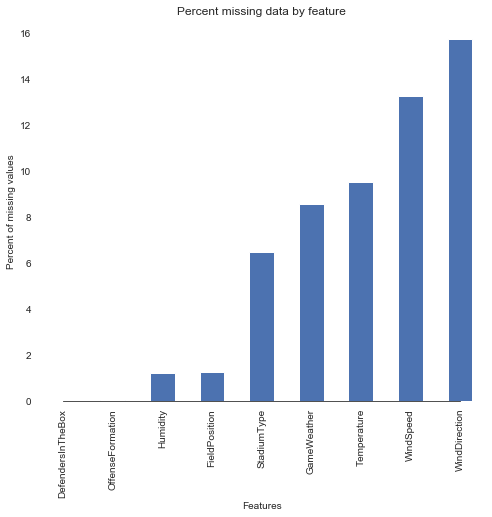

In [9]:
# Setup do plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identificando os valores missing
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

## Analisando Correlacoes

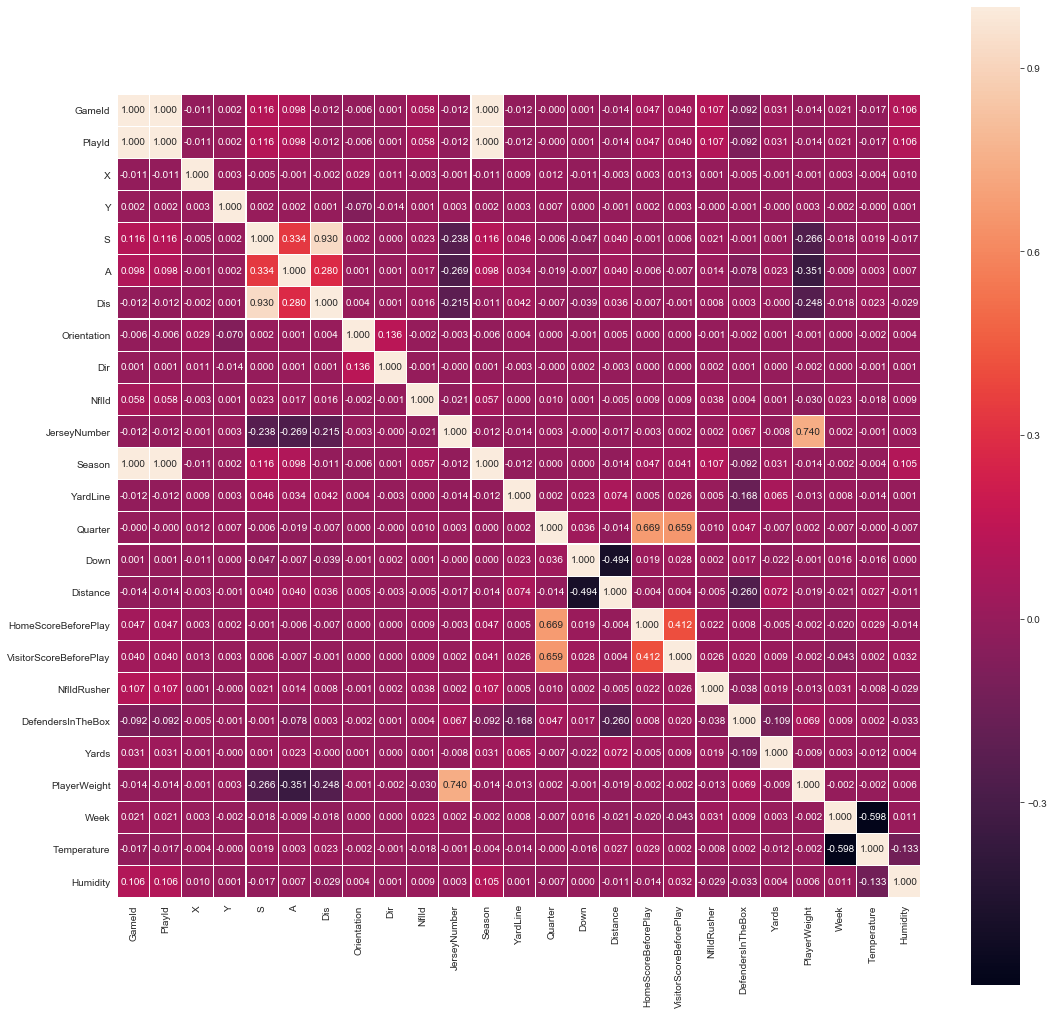

In [10]:
# Correlação de Pearson
cor_mat = train.corr(method = 'pearson')

# Visualizando o grafico de heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=True)

## Analisando a variavel target 'Yards'

In [11]:
# the yardage gained on the play (you are predicting this)
train['Yards'].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

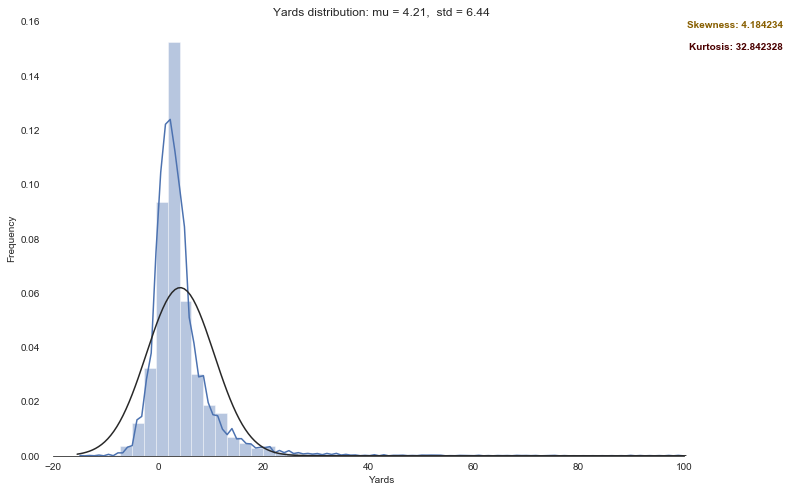

In [12]:
# Analisando a variavel target 'Yards'
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(12, 8))

# Fit a normal distribution
mu, std = norm.fit(train["Yards"])

# Verificando a distribuicao de frequencia da variavel Yards
sns.distplot(train["Yards"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Yards")
ax.set(title="Yards distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adicionando Skewness e Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train["Yards"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train["Yards"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

## Analisando as variaveis gerais do JOGO e os relacionamentos com Yards

In [13]:
# year of the season
train['Season'].value_counts()

2017    261800
2018    247962
Name: Season, dtype: int64

In [110]:
# Visualizando dados estatisticos das variaveis numericas
train['Season'].describe()

count    509762.000000
mean       2017.486427
std           0.499816
min        2017.000000
25%        2017.000000
50%        2017.000000
75%        2018.000000
max        2018.000000
Name: Season, dtype: float64

Text(0.5, 1, 'Yards por Temporada')

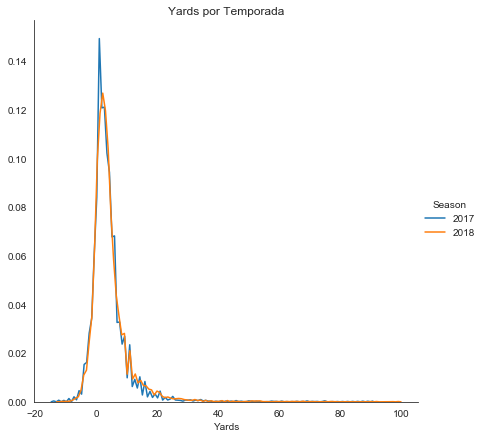

In [14]:
# Verificando a relacao da variavel YARDS com a Temporada
# Aparentemente 2017 e 2018 tem uma mesma distribuicao de Yards
# Uma pequena variacao em 2018 nos picos
sns.FacetGrid(train, hue="Season", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards por Temporada')

In [15]:
# Realizando uma transformacao logaritma na variavel Yards
train["Yards_log"] = np.log1p(train["Yards"])

Text(0.5, 1, 'Yards por Temporada')

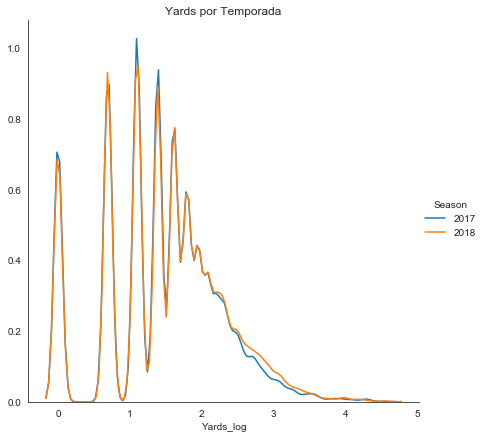

In [16]:
# Verificando a relacao da variavel YARDS (na base logaritima) com a Temporada
# Desta forma conseguimos visualizar uma distribuicao bem parecida de Yards entre as temporadas
sns.FacetGrid(train, hue="Season", height=6) \
   .map(sns.kdeplot, "Yards_log") \
   .add_legend()
plt.title('Yards por Temporada')

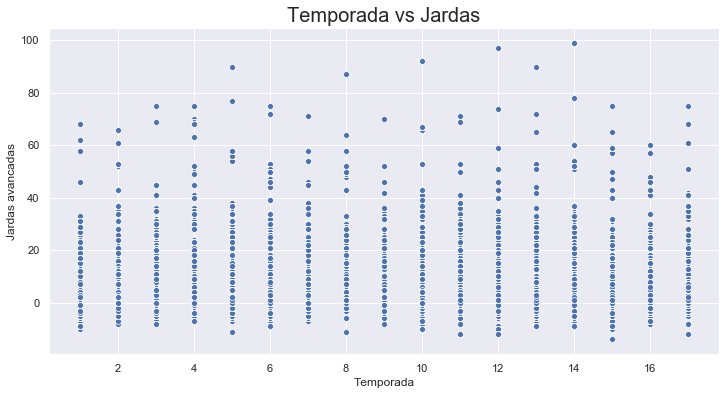

In [111]:
# Exibe o grafico de scatterPlot com a relacao entre Temporada e Jardas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Week', y='Yards', data=train, color='b')
plt.xlabel('Temporada')
plt.ylabel('Jardas avancadas')
plt.title('Temporada vs Jardas', fontsize=20)
plt.show()

In [17]:
# Season tem uma correlação de 1.0 com GameId e PlayId. Exemplo abaixo com 2017 e 2018:
# GameId e PlayId contem o ano e mais algumas informacoes
# Parece ser o mes e o dia e mais um identificador
# Talvez seria necessario deixar a variavel GameId e PlayId somente com o indicador individual
tmp = train.set_index('Season')
print(tmp.loc[[2017], ['GameId','PlayId']].head(1))
print(tmp.loc[[2018], ['GameId','PlayId']].head(1))

            GameId          PlayId
Season                            
2017    2017090700  20170907000118
            GameId          PlayId
Season                            
2018    2018090600  20180906000104


In [18]:
# description of the stadium environment
# Vamos ter que fazer um tratamento nos dados aqui pois tem registros que podem ser agrupados
# Exemplo: Outdoor / Outdoors, Indoor, Indoor, Domed...
train['StadiumType'].value_counts()

Outdoor                   267696
Outdoors                   67474
Indoors                    40854
Dome                       17336
Indoor                     16148
Retractable Roof           15884
Open                        9614
Retr. Roof-Closed           7172
Retr. Roof - Closed         6446
Domed, closed               5918
Domed, open                 2684
Closed Dome                 2134
Dome, closed                1826
Domed                       1826
Oudoor                      1188
Indoor, Roof Closed         1056
Retr. Roof Closed           1056
Retr. Roof-Open              990
Outddors                     968
Bowl                         968
Heinz Field                  902
Outdoor Retr Roof-Open       880
Retr. Roof - Open            880
Outdor                       858
Indoor, Open Roof            858
Ourdoor                      858
Outside                      814
Cloudy                       770
Domed, Open                  770
Name: StadiumType, dtype: int64

Text(0.5, 1, 'Yards x Tipo de Estadio')

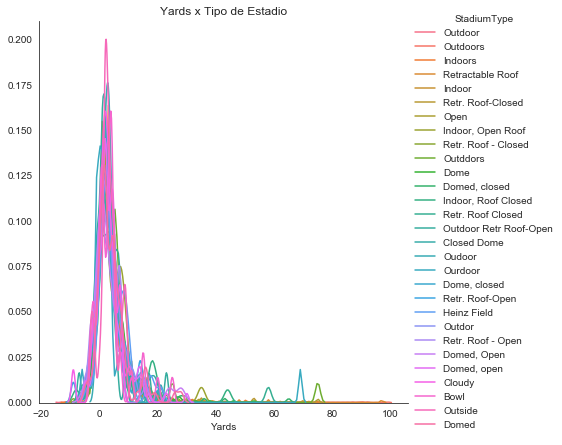

In [19]:
# Verificando a relacao da variavel YARDS com o Tipo de Estadio
# Nao ficou bom o grafico, pois ficou muito poluido
sns.FacetGrid(train, hue="StadiumType", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Tipo de Estadio')

In [20]:
def agrupar_tipo_estadio(StadiumType):
    outdoor       = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
    indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if StadiumType in outdoor:
        return 'outdoor'
    elif StadiumType in indoor_closed:
        return 'indoor_closed'
    elif StadiumType in indoor_open:
        return 'indoor_open'
    elif StadiumType in dome_closed:
        return 'dome_closed'
    elif StadiumType in dome_open:
        return 'dome_open'
    else:
        return 'unknown'

In [21]:
# Executar a funcao para agrupar o nome dos tipos de estadios
train['StadiumType'] = train['StadiumType'].apply(agrupar_tipo_estadio)

In [22]:
# description of the stadium environment
# Agora mais bunitinho, tudo agrupado
train['StadiumType'].value_counts()

outdoor          343376
indoor_closed     88616
unknown           32934
dome_closed       29040
indoor_open       12342
dome_open          3454
Name: StadiumType, dtype: int64

In [23]:
# Verificando quais sao os estadios que ficaram com tipo de estadio indefinido
# Sao tres estadios
# Vou dar uma olhada para saber se tem um tipo definido para eles
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE StadiumType = 'unknown'
        GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

StadiumType          Stadium
0     unknown  MetLife Stadium
1     unknown   StubHub Center
2     unknown  TIAA Bank Field

In [24]:
# Para o MetLife Stadium
# Vou tentar encaixar o tipo indefinido
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium IN ('MetLife Stadium', 'StubHub Center', 'TIAA Bank Field')
        GROUP BY StadiumType, Stadium
        ORDER BY Stadium, StadiumType"""
ps.sqldf(q1, locals())

StadiumType          Stadium
0      outdoor  MetLife Stadium
1      unknown  MetLife Stadium
2      unknown   StubHub Center
3  indoor_open  TIAA Bank Field
4      outdoor  TIAA Bank Field
5      unknown  TIAA Bank Field

In [25]:
# MetLife Stadium so tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/MetLife_Stadium.jpeg')

In [26]:
# StubHub Center so tem OUTDOOR
# Vou atribuir o tipo indefinido para outdoor
from IPython.display import Image
Image(url = '../images/StubHub_center.jpg')

In [27]:
train.loc[train['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
train.loc[train['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

In [28]:
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium = 'Mercedes-Benz Stadium'
         GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

StadiumType                Stadium
0    dome_closed  Mercedes-Benz Stadium
1      dome_open  Mercedes-Benz Stadium
2  indoor_closed  Mercedes-Benz Stadium

In [29]:
# Vista do estadio Mercedes_Benz onde da pra jogar de 3 tipos:
# dome_closed
# dome_open
# indoor_closed
from IPython.display import Image
Image(url = '../images/Mercedes_Benz Stadium.jpg')

Text(0.5, 1, 'Yards x Tipo de Estadio')

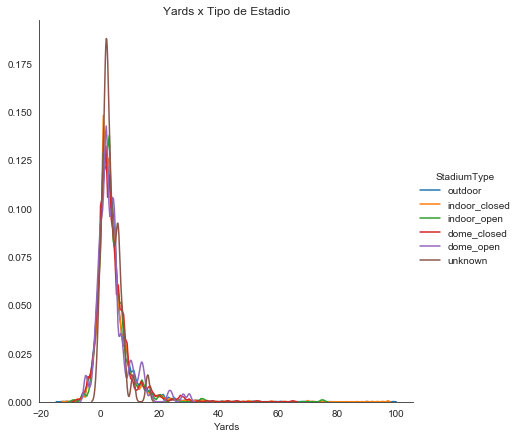

In [30]:
# Verificando a relacao da variavel YARDS com o Tipo de Estadio
# O tipo do estadio nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="StadiumType", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Tipo de Estadio')

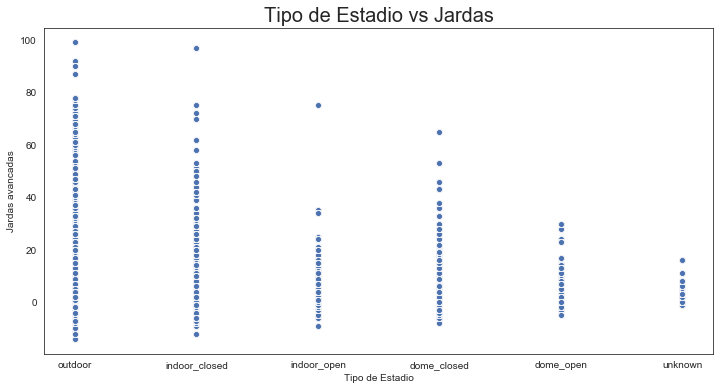

In [31]:
# Exibe o grafico de scatterPlot com a relacao entre tipo estadio e Jardas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='StadiumType', y='Yards', data=train, color='b')
plt.xlabel('Tipo de Estadio')
plt.ylabel('Jardas avancadas')
plt.title('Tipo de Estadio vs Jardas', fontsize=20)
plt.show()

In [32]:
# Esse grafico de Overlapping densities (‘ridge plot’) fica bom
# Da pra ver a relacao de densidade entre as duas features

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparando os dados para o grafico
x = train['Yards']
g = train['StadiumType']
df = pd.DataFrame(dict(x=x, g=g))

# Inicializando o FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=20, palette=pal)

# Desenhando a densidade por steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Colocando o label no grafico
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", fontsize=300, color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")
g.fig.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [99]:
# Funcao para agrupar as descricoes dos estadios
def agrupar_estadio(Stadium):

    if Stadium == 'Broncos Stadium at Mile High':
        return 'Broncos Stadium At Mile High'
    
    elif Stadium in ('CenturyField', 'CenturyLink'):
        return 'CenturyLink Field'
    
    elif Stadium == 'EverBank Field':
        return 'Everbank Field'
    
    elif Stadium in ('FirstEnergy', 'FirstEnergy Stadium', 'FirstEnergyStadium'):
        return 'First Energy Stadium'
   
    elif Stadium == 'Lambeau field':
        return 'Lambeau Field'

    elif Stadium == 'Los Angeles Memorial Coliesum':
        return 'Los Angeles Memorial Coliseum'
    
    elif Stadium in ('M & T Bank Stadium', 'M&T Stadium'):
        return 'M&T Bank Stadium'

    elif Stadium in ('Mercedes-Benz Dome', 'Mercedes-Benz Superdome'):
        return 'Mercedes-Benz SuperDome'
    
    elif Stadium in ('MetLife Stadium', 'Metlife Stadium', 'MetLife'):
        return 'MetLife Stadium' 
    
    elif Stadium == 'NRG':
        return 'NRG Stadium' 

    elif Stadium == 'Oakland-Alameda County Coliseum':
        return 'Oakland Alameda-County Coliseum' 
    
    elif Stadium == 'Paul Brown Stdium':
        return 'Paul Brown Stadium' 

    elif Stadium == 'Twickenham':
        return 'Twickenham Stadium' 
    
    else:
        return Stadium

In [100]:
# Executar a funcao de agrupar os nomes dos estadios
train['Stadium'] = train['Stadium'].apply(agrupar_estadio)

In [101]:
# stadium where the game is being played
train.groupby(['Stadium','StadiumType']).size()

Stadium                              StadiumType  
AT&T Stadium                         indoor_closed    13640
                                     outdoor           2310
Arrowhead Stadium                    outdoor          15334
Bank of America Stadium              outdoor          14036
Broncos Stadium At Mile High         outdoor           7942
CenturyLink Field                    outdoor          16962
Estadio Azteca                       outdoor            902
Everbank Field                       indoor_open       7678
FedExField                           outdoor          15356
First Energy Stadium                 outdoor          14828
Ford Field                           indoor_closed    15246
Gillette Stadium                     outdoor          17248
Hard Rock Stadium                    outdoor          14564
Heinz Field                          outdoor          14850
Lambeau Field                        outdoor          15312
Levis Stadium                        outdoor     

Text(0.5, 1, 'Yards x Estadio')

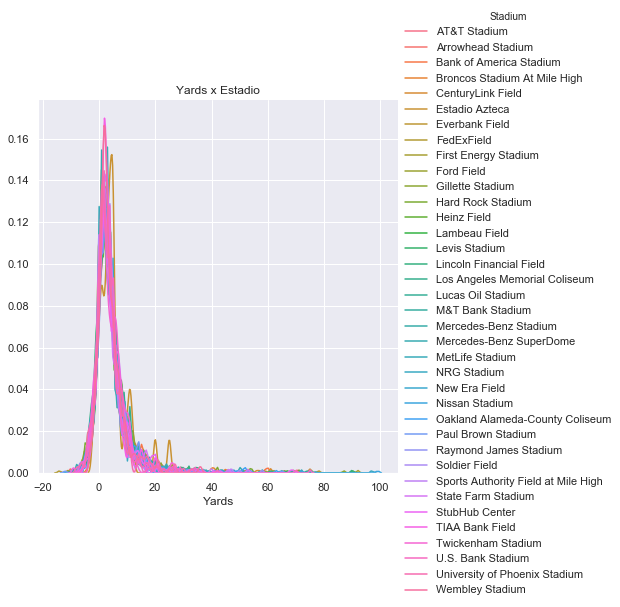

In [102]:
# Verificando a relacao da variavel YARDS com o Tipo de Estadio
# O tipo do estadio nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="Stadium", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Estadio')

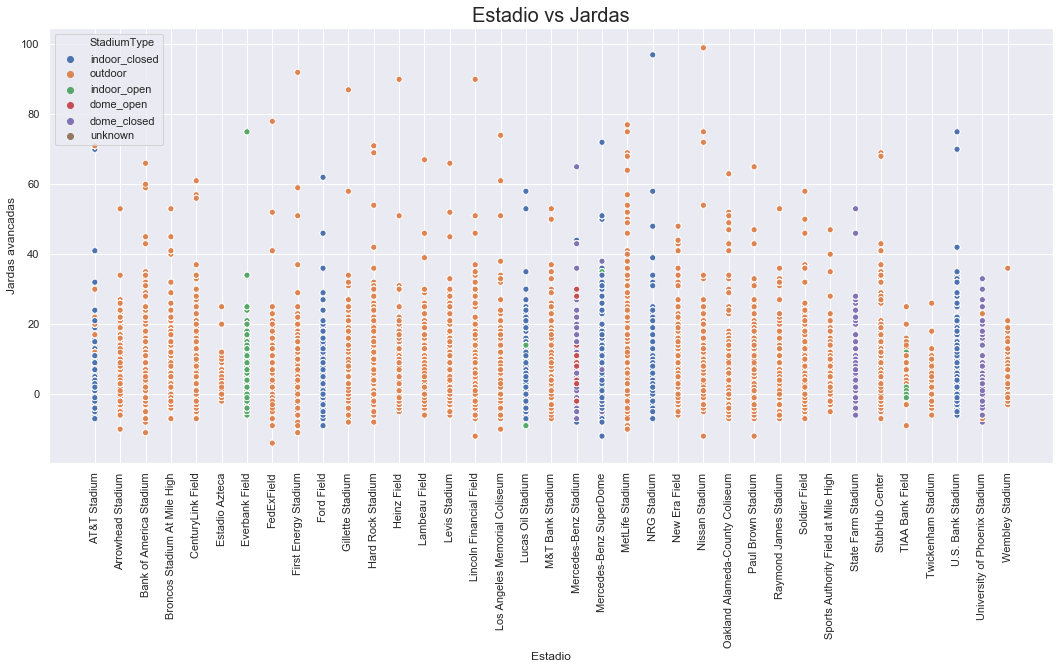

In [103]:
# Exibe o grafico de scatterPlot com a relacao entre Estadio e Jardas
sns.set(style="darkgrid")
plt.figure(figsize=(18, 8))
train.sort_values(by=['Stadium'], inplace=True)
sns.scatterplot(x='Stadium', y='Yards', hue='StadiumType', data=train, color='b')
plt.xlabel('Estadio')
plt.xticks(rotation=90)
plt.ylabel('Jardas avancadas')
plt.title('Estadio vs Jardas', fontsize=20)
plt.show()

In [38]:
# city where the game is being player
# Tem alguns registros que da pra unir... bora la
train.groupby('Location').size()

Location
Arlington, TX                  704
Arlington, Texas             15246
Atlanta, GA                  15246
Baltimore, Maryland           1078
Baltimore, Md.               16016
Carson, CA                   14630
Charlotte, NC                 5192
Charlotte, North Carolina     8844
Chicago, IL                  14498
Chicago. IL                    836
Cincinnati, OH                2112
Cincinnati, Ohio             14476
Cleveland                     1034
Cleveland Ohio                1166
Cleveland, OH                  836
Cleveland, Ohio               8316
Cleveland,Ohio                3476
Denver, CO                   16478
Detroit                      10670
Detroit, MI                   4576
E. Rutherford, NJ             1452
East Rutherford, N.J.         2024
East Rutherford, NJ          30096
Foxborough, MA               15224
Foxborough, Ma                2024
Glendale, AZ                 16434
Green Bay, WI                15312
Houston, TX                   9746
Houston, Te

In [39]:
# Funcao para agrupar a localizacao do estadio e do jogo
def agrupar_local(Location):

    if Location == "Arlington, Texas":
        return "Arlington, TX"
    elif Location in ("Baltimore, Maryland","Baltimore, Md."):
        return "Baltimore, MD"
    elif Location == "Charlotte, North Carolina":
        return "Charlotte, NC"
    elif Location == "Chicago. IL":
        return "Chicago, IL"
    elif Location == "Cincinnati, Ohio":
        return "Cincinnati, OH"
    elif Location in ("Cleveland","Cleveland Ohio","Cleveland, Ohio","Cleveland,Ohio"):
        return "Cleveland, OH"
    elif Location == "Detroit":
        return "Detroit, MI"
    elif Location == "E. Rutherford, NJ" or Location == "East Rutherford, N.J.":
        return "East Rutherford, NJ"
    elif Location == "Foxborough, Ma":
        return "Foxborough, MA"
    elif Location == "Houston, Texas":
        return "Houston, TX"
    elif Location in ("Jacksonville Florida","Jacksonville, Fl","Jacksonville, Florida"):
        return "Jacksonville, FL"
    elif Location == "London":
        return "London, England"
    elif Location == "Los Angeles, Calif.":
        return "Los Angeles, CA"
    elif Location == "Miami Gardens, Fla.":
        return "Miami Gardens, FLA"
    elif Location in ("New Orleans","New Orleans, La."):
        return "New Orleans, LA"
    elif Location == "Orchard Park NY":
        return "Orchard Park, NY"
    elif Location == "Philadelphia, Pa.":
        return "Philadelphia, PA"
    elif Location == "Pittsburgh":
        return "Pittsburgh, PA"
    elif Location == "Seattle":
        return "Seattle, WA"
    else:
        return Location

In [40]:
# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Location'] = train['Location'].apply(agrupar_local)

In [41]:
# city where the game is being player
train.groupby('Location').size()

Location
Arlington, TX          15950
Atlanta, GA            15246
Baltimore, MD          17094
Carson, CA             14630
Charlotte, NC          14036
Chicago, IL            15334
Cincinnati, OH         16588
Cleveland, OH          14828
Denver, CO             16478
Detroit, MI            15246
East Rutherford, NJ    33572
Foxborough, MA         17248
Glendale, AZ           16434
Green Bay, WI          15312
Houston, TX            15884
Indianapolis, Ind.     16544
Jacksonville, FL       14124
Kansas City,  MO        1144
Kansas City, MO        14190
Landover, MD           15356
London, England         6644
Los Angeles, CA        14674
Mexico City              902
Miami Gardens, FLA     14564
Minneapolis, MN        16170
Nashville, TN          15862
New Orleans, LA        15554
Oakland, CA            14564
Orchard Park, NY       17204
Philadelphia, PA       14476
Pittsburgh, PA         14850
Santa Clara, CA        17402
Seattle, WA            16962
Tampa, FL              14696
dtype

Text(0.5, 1, 'Yards x Location do Estadio')

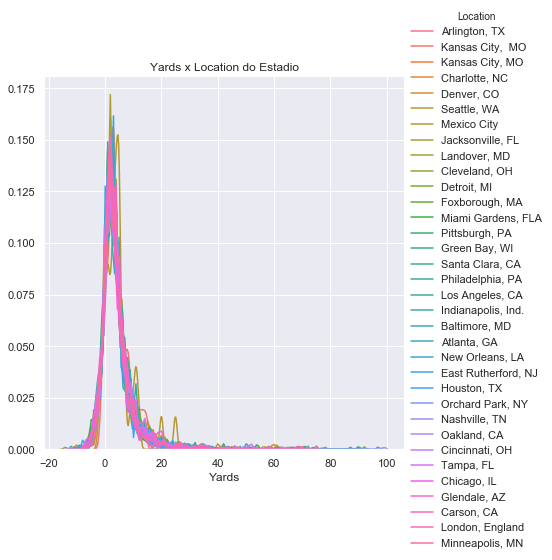

In [42]:
# Verificando a relacao da variavel YARDS com o Localizacao do Estadio
# A localizacao nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="Location", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Location do Estadio')

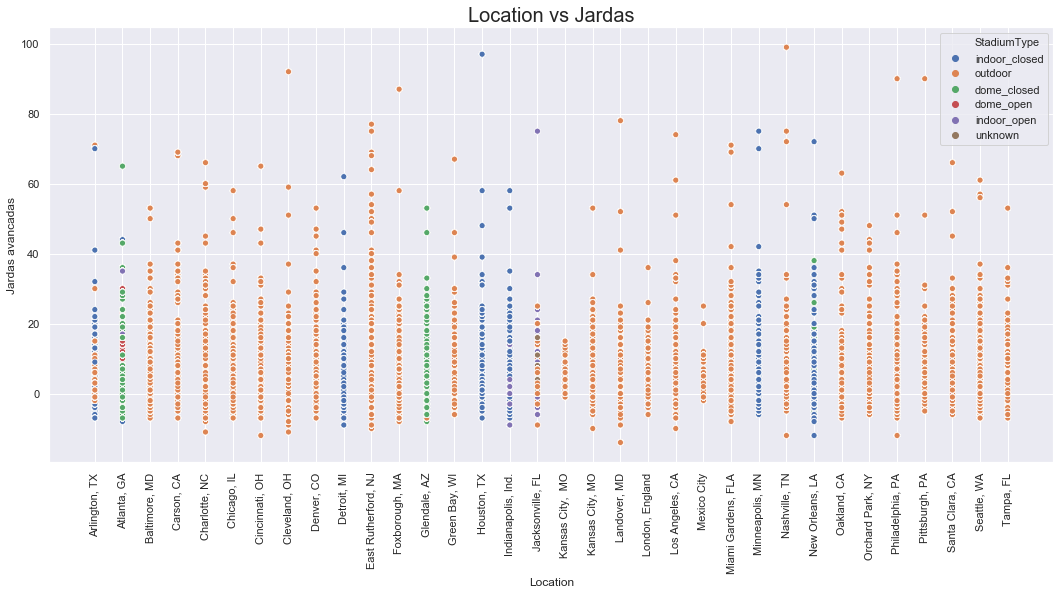

In [104]:
# Exibe o grafico de scatterPlot com a relacao entre Location e Jardas
sns.set(style="darkgrid")
plt.figure(figsize=(18, 8))
train.sort_values(by=['Location'], inplace=True)
sns.scatterplot(x='Location', y='Yards', hue='StadiumType', data=train, color='b')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Jardas avancadas')
plt.title('Location vs Jardas', fontsize=20)
plt.show()

In [43]:
# Funcao para agrupar o gramado do estadio
def agrupar_gramado(Turf):
    if Turf == 'Artifical':
        return 'Artificial'
    
    elif Turf in ('FieldTurf', 'Field turf'):
        return 'Field Turf'

    elif Turf == 'FieldTurf360':
        return 'Field Turf 360'

    elif Turf in ('Natural', 'Natural grass', 'Naturall Grass', 'grass', 'natural grass', 'SISGrass', 'Natural Grass'):
        return "Grass"

    elif Turf == "UBU Sports Speed S5-M":
        return "UBU Speed Series-S5-M"

    else:
        return Turf

In [44]:
# Executar a funcao de agrupar a descricao dos locais dos jogos
train['Turf'] = train['Turf'].apply(agrupar_gramado)

In [45]:
# description of the field surface
# Tipos de gramados dos estadios
train.groupby('Turf').size()

Turf
A-Turf Titan               17204
Artificial                 48378
DD GrassMaster              8074
Field Turf                 81862
Field Turf 360              8272
FieldTurf 360               6974
Grass                     289520
Twenty-Four/Seven Turf      8030
UBU Speed Series-S5-M      41448
dtype: int64

In [46]:
# Verificando a quantidade de jogos por tipo de gramado
tmp = train[['Season','GameId','Turf']]
tmp = tmp.drop_duplicates()
tmp.groupby(['Season','Turf']).size()

Season  Turf                  
2017    A-Turf Titan                8
        Artificial                 24
        DD GrassMaster              8
        Field Turf                 40
        Field Turf 360              2
        FieldTurf 360               6
        Grass                     144
        UBU Speed Series-S5-M      24
2018    A-Turf Titan                8
        Artificial                 24
        Field Turf                 40
        Field Turf 360              7
        FieldTurf 360               1
        Grass                     152
        Twenty-Four/Seven Turf      8
        UBU Speed Series-S5-M      16
dtype: int64

Text(0.5, 1, 'Yards x Gramado')

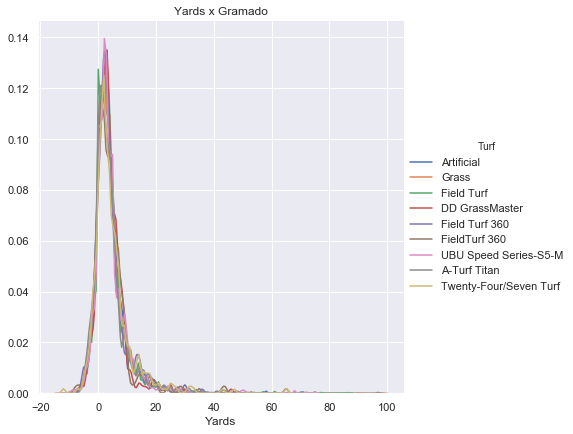

In [47]:
# Verificando a relacao da variavel YARDS com o gramado do estadio
# O gramado tambem nao parece influenciar a quantidade de jardas avançadas na jogada
sns.FacetGrid(train, hue="Turf", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Gramado')

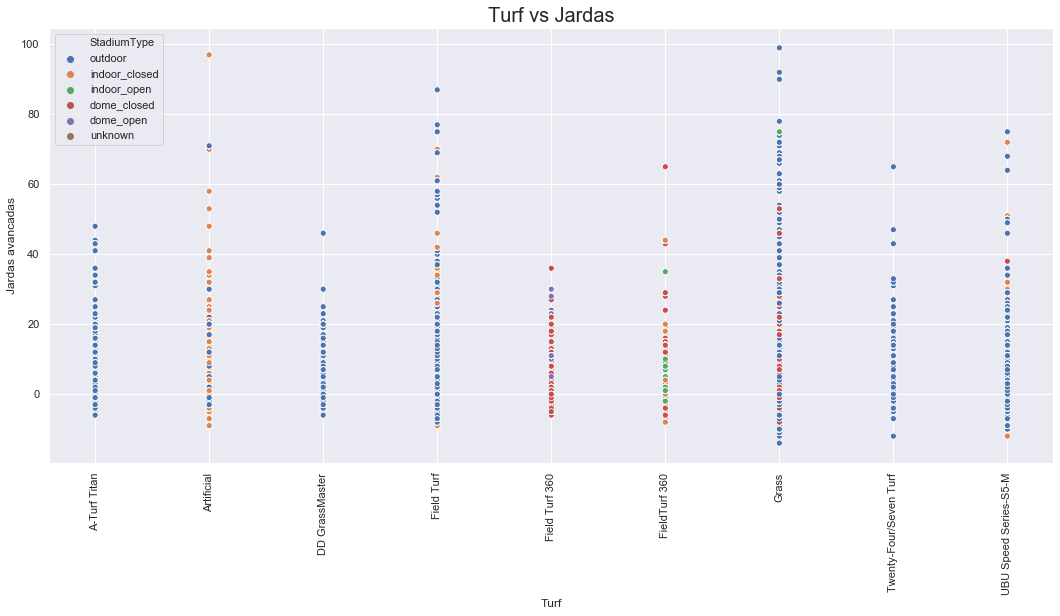

In [105]:
# Exibe o grafico de scatterPlot com a relacao entre Location e Jardas
sns.set(style="darkgrid")
plt.figure(figsize=(18, 8))
train.sort_values(by=['Turf'], inplace=True)
sns.scatterplot(x='Turf', y='Yards', hue='StadiumType', data=train, color='b')
plt.xlabel('Turf')
plt.xticks(rotation=90)
plt.ylabel('Jardas avancadas')
plt.title('Turf vs Jardas', fontsize=20)
plt.show()

In [48]:
# a unique game identifier
# O dataset contem 512 jogos realizados em 2017 e 2018
train['GameId'].value_counts()

2017121000    1870
2017101501    1628
2017100108    1452
2017092100    1386
2017091002    1386
2017110504    1386
2018111807    1386
2018100700    1342
2018123014    1342
2018090901    1342
2018111106    1320
2017121400    1298
2018122308    1276
2017091005    1254
2017100809    1254
2018102500    1254
2018092000    1254
2018100711    1254
2018120207    1254
2017100101    1232
2017123103    1232
2018123015    1232
2017100900    1232
2017100102    1232
2017091711    1232
2018090905    1232
2018093008    1232
2017123107    1232
2018102808    1210
2017100807    1210
2017102202    1210
2017102600    1210
2017121703    1210
2017102209    1210
2018122200    1210
2018121609    1210
2018092312    1210
2018112501    1210
2017122406    1210
2017102208    1188
2017122409    1188
2017122404    1188
2018093009    1188
2018121602    1188
2017121708    1188
2017123101    1188
2017121012    1188
2017111211    1188
2017102904    1166
2017092400    1166
2018120909    1166
2017120304    1166
2018121608  

In [49]:
# a unique play identifier
# Sao 22 registros por jogada
# Pois sao 11 jogadores do time da casa e 11 jogadores do time visitante
train['PlayId'].value_counts()

20181007011551    22
20181213001041    22
20181111021012    22
20180930094139    22
20181028023394    22
20171231153278    22
20181007023216    22
20180910011465    22
20170928000166    22
20171112012988    22
20171126103196    22
20171126033662    22
20171224071408    22
20170924131527    22
20181202120466    22
20170925000559    22
20171001032554    22
20181115002700    22
20171112044461    22
20181216081841    22
20171005003655    22
20180923012541    22
20170917051736    22
20180930073207    22
20170917041501    22
20171217101579    22
20181202080613    22
20170917104510    22
20181007033211    22
20171231130441    22
20180923061077    22
20171015011248    22
20181014100976    22
20171001102903    22
20181007090207    22
20181008001618    22
20171112053416    22
20170918003383    22
20181230140128    22
20170910022384    22
20171001120063    22
20181202132252    22
20171112090950    22
20171002002752    22
20181230120954    22
20171105032141    22
20171203053511    22
2017102209183

In [50]:
# Exemplo para visualizar uma unica jogada do time visitante
# Sao 11 registros, pois sao 11 jogadores
# Mas nao importa o jogador, pois a quantidade de jardas avancadas esta relacionada a jogada (PlayId)
q1 = """SELECT GameID, PlayID, Team, NflId, DisplayName, Yards
          FROM train
         WHERE PlayID = 20181007011551
           AND Team = 'away'"""
ps.sqldf(q1, locals())

GameId          PlayId  Team    NflId        DisplayName  Yards
0   2018100701  20181007011551  away  2560740          B.J. Hill     14
1   2018100701  20181007011551  away  2553822       Curtis Riley     14
2   2018100701  20181007011551  away  2552454     Landon Collins     14
3   2018100701  20181007011551  away  2550437         Josh Mauro     14
4   2018100701  20181007011551  away  2543738      Kareem Martin     14
5   2018100701  20181007011551  away  2541792  Ray-Ray Armstrong     14
6   2018100701  20181007011551  away  2540143      Alec Ogletree     14
7   2018100701  20181007011551  away  2539338          B.W. Webb     14
8   2018100701  20181007011551  away  2535718     Damon Harrison     14
9   2018100701  20181007011551  away  2532875    Janoris Jenkins     14
10  2018100701  20181007011551  away  2555277          Eli Apple     14

In [51]:
# Verificar outro jogo para consolidar o entendimento
q1 = """SELECT GameID, PlayID, Team, NflId, DisplayName, Yards
          FROM train
         WHERE PlayID = 20181007090207
           AND Team = 'away'"""
ps.sqldf(q1, locals())

GameId          PlayId  Team    NflId       DisplayName  Yards
0   2018100709  20181007090207  away  2532820      Kirk Cousins      6
1   2018100709  20181007090207  away  2533042       Riley Reiff      6
2   2018100709  20181007090207  away  2535607      Mike Remmers      6
3   2018100709  20181007090207  away  2541785      Adam Thielen      6
4   2018100709  20181007090207  away  2555214  Laquon Treadwell      6
5   2018100709  20181007090207  away  2556557       Rashod Hill      6
6   2018100709  20181007090207  away  2558848       Pat Elflein      6
7   2018100709  20181007090207  away  2560898        Roc Thomas      6
8   2018100709  20181007090207  away  2532816       Tom Compton      6
9   2018100709  20181007090207  away  2495438      Kyle Rudolph      6
10  2018100709  20181007090207  away  2495331  Aldrick Robinson      6

In [52]:
# Pesquisando pelo ID do jogador
# O jogador participa de varias jogadas, por isso Jardas diferentes
# Mas nem sempre a bola esta com ele
q1 = """SELECT GameID, PlayID, Team, NflId, DisplayName, Yards
          FROM train
         WHERE NflId IN (2495331, 2495438)"""
ps.sqldf(q1, locals())

GameId          PlayId  Team    NflId       DisplayName  Yards
0    2017121001  20171210010352  away  2495438      Kyle Rudolph      2
1    2017121001  20171210012953  away  2495438      Kyle Rudolph     -3
2    2017121001  20171210012620  away  2495438      Kyle Rudolph     -2
3    2017121001  20171210012735  away  2495438      Kyle Rudolph     11
4    2017121001  20171210011440  away  2495438      Kyle Rudolph      8
5    2017121001  20171210011371  away  2495438      Kyle Rudolph      7
6    2017121001  20171210011461  away  2495438      Kyle Rudolph     17
7    2017121001  20171210011216  away  2495438      Kyle Rudolph      4
8    2017121001  20171210011763  away  2495438      Kyle Rudolph      3
9    2017121001  20171210010072  away  2495438      Kyle Rudolph     -4
10   2017121001  20171210010117  away  2495438      Kyle Rudolph     -4
11   2017121001  20171210010051  away  2495438      Kyle Rudolph      3
12   2017091712  20170917121746  away  2495331  Aldrick Robinson      1
13   2017091712  20170917121981  away  2495331  Aldrick Robinson     -2
14   2017091712  20170917122809  away  2495331  Aldrick Robinson      1
15   2018121000  20181210003138  away  2495438      Kyle Rudolph      8
16   2018121000  20181210003242  away  2495438      Kyle Rudolph      1
17   2018121000  20181210002996  away  2495438      Kyle Rudolph      1
18   2018121000  20181210002950  away  2495438      Kyle Rudolph      2
19   2018121000  20181210002447  away  2495438      Kyle Rudolph      3
20   2018121000  20181210002365  away  2495438      Kyle Rudolph      6
21   2018121000  20181210002534  away  2495438      Kyle Rudolph      0
22   2018121000  20181210001304  away  2495438      Kyle Rudolph      3
23   2018121000  20181210000984  away  2495438      Kyle Rudolph      5
24   2018121000  20181210001282  away  2495438      Kyle Rudolph     13
25   2018121000  20181210000061  away  2495438      Kyle Rudolph      1
26   2018121000  20181210000132  away  2495438      Kyle Rudolph      0
27   2018121000  20181210000108  away  2495438      Kyle Rudolph      6
28   2018121000  20181210000960  away  2495438      Kyle Rudolph      2
29   2018121000  20181210000458  away  2495438      Kyle Rudolph      2
30   2018121000  20181210000340  away  2495438      Kyle Rudolph     -1
31   2018121000  20181210000398  away  2495438      Kyle Rudolph     13
32   2017111207  20171112070588  away  2495438      Kyle Rudolph      2
33   2017111207  20171112070609  away  2495438      Kyle Rudolph      1
34   2017111207  20171112072886  away  2495438      Kyle Rudolph      2
35   2017111207  20171112072763  away  2495438      Kyle Rudolph      9
36   2017111207  20171112072718  away  2495438      Kyle Rudolph     -2
37   2017111207  20171112073418  away  2495438      Kyle Rudolph      5
38   2017111207  20171112073397  away  2495438      Kyle Rudolph      3
39   2017111207  20171112073439  away  2495438      Kyle Rudolph      4
40   2017111207  20171112073286  away  2495438      Kyle Rudolph      3
41   2017111207  20171112073102  away  2495438      Kyle Rudolph      0
42   2017111207  20171112073376  away  2495438      Kyle Rudolph      0
43   2017111207  20171112073355  away  2495438      Kyle Rudolph      9
44   2017111207  20171112071161  away  2495438      Kyle Rudolph      2
45   2017111207  20171112071066  away  2495438      Kyle Rudolph      6
46   2017111207  20171112072238  away  2495438      Kyle Rudolph      5
47   2017111207  20171112072100  away  2495438      Kyle Rudolph     13
48   2017111207  20171112072311  away  2495438      Kyle Rudolph      5
49   2017111207  20171112071833  away  2495438      Kyle Rudolph      7
50   2017111207  20171112071812  away  2495438      Kyle Rudolph      4
51   2017111207  20171112071919  away  2495438      Kyle Rudolph     -2
52   2017111207  20171112073788  away  2495438      Kyle Rudolph      0
53   2017111207  20171112073515  away  2495438      Kyle Rudolph     -2
54   2017111207  20171112073491  away  2495438   

In [53]:
# Confirmando que o registro de JARDAS (Yards) é para cada jogada (PlayId)
q1 = """SELECT GameID, PlayID, Team, Yards
          FROM train
         GROUP BY GameID, PlayID, Team
         ORDER BY GameID, PlayID"""
ps.sqldf(q1, locals())

GameId          PlayId  Team  Yards
0      2017090700  20170907000118  away      8
1      2017090700  20170907000118  home      8
2      2017090700  20170907000139  away      3
3      2017090700  20170907000139  home      3
4      2017090700  20170907000189  away      5
5      2017090700  20170907000189  home      5
6      2017090700  20170907000345  away      2
7      2017090700  20170907000345  home      2
8      2017090700  20170907000395  away      7
9      2017090700  20170907000395  home      7
10     2017090700  20170907000473  away     10
11     2017090700  20170907000473  home     10
12     2017090700  20170907000516  away     -1
13     2017090700  20170907000516  home     -1
14     2017090700  20170907000653  away      0
15     2017090700  20170907000653  home      0
16     2017090700  20170907000680  away      9
17     2017090700  20170907000680  home      9
18     2017090700  20170907000801  away      9
19     2017090700  20170907000801  home      9
20     2017090700  20170907000917  away      2
21     2017090700  20170907000917  home      2
22     2017090700  20170907001004  away      3
23     2017090700  20170907001004  home      3
24     2017090700  20170907001077  away     13
25     2017090700  20170907001077  home     13
26     2017090700  20170907001156  away      4
27     2017090700  20170907001156  home      4
28     2017090700  20170907001177  away      0
29     2017090700  20170907001177  home      0
30     2017090700  20170907001296  away      4
31     2017090700  20170907001296  home      4
32     2017090700  20170907001355  away      4
33     2017090700  20170907001355  home      4
34     2017090700  20170907001376  away      4
35     2017090700  20170907001376  home      4
36     2017090700  20170907001443  away      0
37     2017090700  20170907001443  home      0
38     2017090700  20170907001488  away     16
39     2017090700  20170907001488  home     16
40     2017090700  20170907001509  away      9
41     2017090700  20170907001509  home      9
42     2017090700  20170907001530  away      4
43     2017090700  20170907001530  home      4
44     2017090700  20170907001551  away      2
45     2017090700  20170907001551  home      2
46     2017090700  20170907001605  away      2
47     2017090700  20170907001605  home      2
48     2017090700  20170907001664  away      3
49     2017090700  20170907001664  home      3
50     2017090700  20170907001715  away      1
51     2017090700  20170907001715  home      1
52     2017090700  20170907001736  away      4
53     2017090700  20170907001736  home      4
54     2017090700  20170907001819  away      4
55     2017090700  20170907001819  home      4
56     2017090700  20170907001955  away      7
57     2017090700  20170907001955  home      7
58     2017090700  20170907002430  away     10
59     2017090700  20170907002430  home     10
60     2017090700  20170907002648  away      2
61     2017090700  20170907002648  home      2
62     2017090700  20170907002669  away     -4
63     2017090700  20170907002669  home     -4
64     2017090700  20170907002829  away      4
65     2017090700  20170907002829  home      4
66     2017090700  20170907002900  away      5
67     2017090700  20170907002900  home      5
68     2017090700  20170907002961  away      1
69     2017090700  20170907002961  home      1
70     2017090700  20170907003138  away      0
71     2017090700  20170907003138  home      0
72     2017090700  20170907003161  away      1
73     2017090700  20170907003161  home      1
74     2017090700  20170907003261  away      1
75     2017090700  20170907003261  home      1
76     2017090700  20170907003444  away      7
77     2017090700  20170907003444  home      7
78     2017090700  20170907003465  away      4
79     2017090700  20170907003465  home      4
80     2017090700  20170907003507  away     -6
81     2017090700  20170907003507  home     -6
82     2017090700  20170907003635  away     13
83     2017090700  20170907003635  home     13
84     201709070

In [54]:
# home or away
train['Team'].value_counts()

away    254881
home    254881
Name: Team, dtype: int64

Text(0.5, 1, 'Yards x Team')

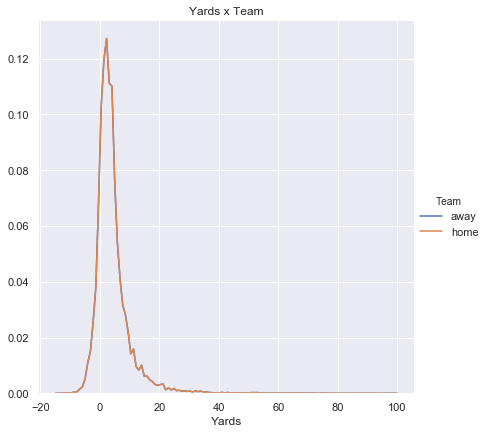

In [116]:
# Verificando a relacao da variavel YARDS com o Team (casa ou visitante)
# Mesma distribuicao da jardas com visitantes e donos da casa
sns.FacetGrid(train, hue="Team", height=6) \
   .map(sns.kdeplot, "Yards") \
   .add_legend()
plt.title('Yards x Team')

### Analisando as variaveis do JOGO

In [55]:
# game quarter (1-5, 5 == overtime)
train['Quarter'].value_counts()

1    132066
4    126434
3    125026
2    122430
5      3806
Name: Quarter, dtype: int64

In [153]:
# Verificando a quantidade de jogos por tipo de gramado
tmp = train[['Quarter', 'Yards']]
tmp = tmp.drop_duplicates()
tmp = tmp.set_index('Quarter')

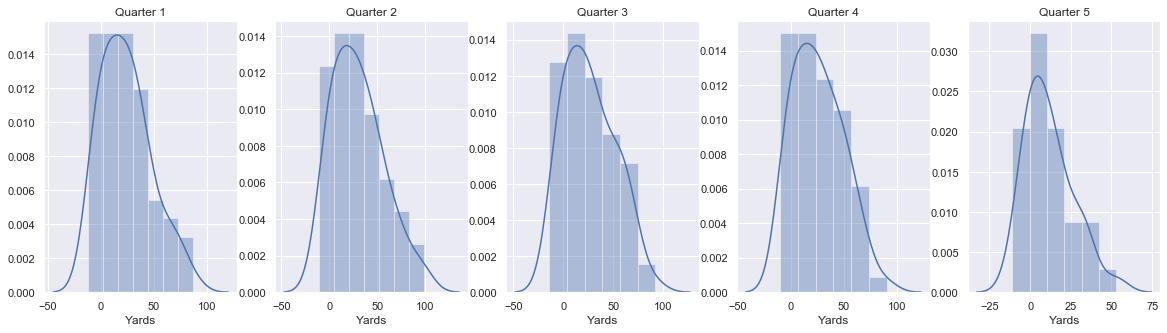

In [154]:
# Neste grafico da pra visualizar que o Quarter 05 tem um intervalo menor de jardas avancadas (ou nao)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, figsize=(20, 5))

ax1.set_title('Quarter 1')
sns.distplot(tmp['Yards'].loc[1], ax=ax1)

ax2.set_title('Quarter 2')
sns.distplot(tmp['Yards'].loc[2], ax=ax2)

ax3.set_title('Quarter 3')
sns.distplot(tmp['Yards'].loc[3], ax=ax3)

ax4.set_title('Quarter 4')
sns.distplot(tmp['Yards'].loc[4], ax=ax4)

ax5.set_title('Quarter 5')
sns.distplot(tmp['Yards'].loc[5], ax=ax5)

plt.show()


In [56]:
# time on the game clock
train['GameClock'].value_counts()

15:00:00    14476
02:00:00     5236
14:54:00     2156
14:55:00     1958
14:56:00     1276
14:20:00     1188
14:25:00     1144
14:24:00     1078
14:53:00     1078
14:22:00     1056
01:54:00     1012
14:19:00      990
14:21:00      968
14:28:00      946
02:39:00      924
14:23:00      924
14:16:00      924
11:26:00      924
14:26:00      902
03:55:00      902
02:32:00      880
05:46:00      880
02:23:00      880
01:53:00      858
12:54:00      858
04:35:00      858
14:15:00      858
09:33:00      836
14:18:00      836
02:53:00      836
01:56:00      836
14:17:00      836
13:05:00      836
01:55:00      814
02:20:00      814
04:20:00      814
04:02:00      814
11:44:00      792
08:11:00      792
02:22:00      792
08:52:00      792
03:32:00      792
13:42:00      792
06:10:00      792
09:18:00      792
13:03:00      792
10:51:00      770
04:15:00      770
09:36:00      770
03:35:00      770
08:58:00      770
13:37:00      770
02:28:00      770
12:58:00      748
08:30:00      748
14:52:00  

In [57]:
# home team abbreviation 
train['HomeTeamAbbr'].value_counts()

SF     17402
NYG    17336
NE     17248
BUF    17204
BAL    17094
SEA    16962
CIN    16588
IND    16544
DEN    16478
OAK    16456
ARI    16434
NYJ    16236
MIN    16170
JAX    15972
DAL    15950
CLE    15928
HOU    15884
TEN    15862
LA     15642
NO     15554
LAC    15532
MIA    15400
WAS    15356
CHI    15334
KC     15334
GB     15312
ATL    15246
DET    15246
PIT    14850
TB     14696
PHI    14476
CAR    14036
Name: HomeTeamAbbr, dtype: int64

In [58]:
# home team score before play started
train['HomeScoreBeforePlay'].value_counts()

0     121418
7      63514
10     41602
3      41228
14     32956
17     28754
13     18700
6      17534
20     16368
24     15114
21     13420
16     11396
9      10472
23      9724
27      8536
28      6798
31      5962
26      5038
30      4620
35      3454
15      3190
12      2860
38      2794
34      2750
19      2508
29      2156
33      1672
18      1562
45      1562
37      1518
2       1386
40      1342
42      1188
22       924
44       682
8        660
25       550
39       506
48       484
11       462
52       418
32       396
36       308
47       308
43       286
54       176
41       132
51       132
46       132
57       110
Name: HomeScoreBeforePlay, dtype: int64

In [59]:
# visitor team abbreviation
train['VisitorTeamAbbr'].value_counts()

LA     17864
JAX    17072
IND    16764
LAC    16720
DEN    16698
OAK    16478
TEN    16478
WAS    16390
NYJ    16390
DET    16368
ARI    16302
SF     16302
MIA    16236
HOU    16170
NO     16038
CHI    16038
KC     15862
DAL    15840
BAL    15818
SEA    15774
MIN    15774
CIN    15708
BUF    15664
NE     15510
CLE    15422
TB     15378
NYG    15356
GB     15312
PIT    15114
ATL    15092
PHI    14168
CAR    13662
Name: VisitorTeamAbbr, dtype: int64

In [60]:
# visitor team score before play started
train['VisitorScoreBeforePlay'].value_counts()

0     142516
7      63448
3      48532
10     41228
14     28094
17     24728
13     23012
6      21714
20     15026
21     11528
24     11154
16      9570
9       7854
23      7018
27      6930
12      5940
19      5918
28      4994
30      3740
31      3256
34      2222
35      2222
26      2178
15      1892
22      1716
2       1474
38      1408
33      1408
42       968
48       924
37       924
40       858
18       748
41       704
25       682
32       572
29       550
5        550
39       396
11       308
51       242
8        198
36       176
45       176
44        66
Name: VisitorScoreBeforePlay, dtype: int64

In [61]:
# team with possession
train['PossessionTeam'].value_counts()

NE     18700
LA     17952
BLT    17864
NO     17490
JAX    17490
SEA    17094
DAL    16918
HST    16764
MIN    16742
LAC    16698
DEN    16654
TEN    16544
PHI    16478
CHI    16368
BUF    16214
SF     16192
IND    16060
NYG    15642
DET    15554
NYJ    15532
ATL    15488
OAK    15422
PIT    15312
WAS    15092
ARZ    15092
KC     14300
CIN    14278
TB     14212
MIA    14168
CAR    14146
CLV    14102
GB     13200
Name: PossessionTeam, dtype: int64

In [62]:
# which side of the field the play is happening on
train['FieldPosition'].value_counts()

BUF    17468
OAK    17182
NYG    17160
ARZ    17072
MIA    16984
NYJ    16896
CLV    16676
CIN    16588
DEN    16566
SF     16456
SEA    16412
HST    16346
CHI    16060
IND    16038
TEN    15972
GB     15862
LA     15818
JAX    15620
DAL    15576
WAS    15554
DET    15444
BLT    15356
TB     15246
MIN    15158
LAC    15114
ATL    14938
KC     14784
NE     14718
PIT    14366
PHI    13442
NO     13332
CAR    13134
Name: FieldPosition, dtype: int64

### Analisando as variaveis de ACOES no JOGO

In [63]:
# offensive team positional grouping
train['OffensePersonnel'].value_counts()

1 RB, 1 TE, 3 WR               232958
1 RB, 2 TE, 2 WR               114092
2 RB, 1 TE, 2 WR                53636
1 RB, 3 TE, 1 WR                31306
2 RB, 2 TE, 1 WR                25828
6 OL, 1 RB, 2 TE, 1 WR           9680
6 OL, 1 RB, 1 TE, 2 WR           8426
6 OL, 2 RB, 1 TE, 1 WR           5896
6 OL, 2 RB, 2 TE, 0 WR           3762
2 RB, 0 TE, 3 WR                 3454
1 RB, 2 TE, 1 WR,1 DL            3102
6 OL, 1 RB, 0 TE, 3 WR           2178
1 RB, 0 TE, 4 WR                 1870
0 RB, 1 TE, 4 WR                 1672
2 QB, 1 RB, 1 TE, 2 WR           1562
2 RB, 3 TE, 0 WR                 1408
6 OL, 1 RB, 3 TE, 0 WR           1210
6 OL, 2 RB, 0 TE, 2 WR           1056
1 RB, 1 TE, 2 WR,1 DL             748
7 OL, 1 RB, 0 TE, 2 WR            682
3 RB, 1 TE, 1 WR                  572
2 QB, 2 RB, 1 TE, 1 WR            550
1 RB, 3 TE, 0 WR,1 DL             440
6 OL, 1 RB, 2 TE, 0 WR,1 DL       352
3 RB, 0 TE, 2 WR                  286
2 QB, 1 RB, 2 TE, 1 WR            264
6 OL, 1 RB, 

In [64]:
# defensive team positional grouping
train['DefensePersonnel'].value_counts()

4 DL, 2 LB, 5 DB          139876
4 DL, 3 LB, 4 DB          136510
3 DL, 4 LB, 4 DB           80432
2 DL, 4 LB, 5 DB           56936
3 DL, 3 LB, 5 DB           48884
2 DL, 3 LB, 6 DB           11638
4 DL, 1 LB, 6 DB            9196
4 DL, 4 LB, 3 DB            5214
3 DL, 2 LB, 6 DB            4246
5 DL, 2 LB, 4 DB            3542
5 DL, 3 LB, 3 DB            2376
1 DL, 4 LB, 6 DB            1430
3 DL, 5 LB, 3 DB            1408
6 DL, 4 LB, 1 DB            1232
5 DL, 4 LB, 2 DB            1166
6 DL, 3 LB, 2 DB            1034
5 DL, 1 LB, 5 DB             902
6 DL, 2 LB, 3 DB             704
1 DL, 5 LB, 5 DB             682
2 DL, 5 LB, 4 DB             484
2 DL, 2 LB, 7 DB             286
1 DL, 3 LB, 7 DB             286
3 DL, 1 LB, 7 DB             264
5 DL, 3 LB, 2 DB, 1 OL       154
5 DL, 5 LB, 1 DB             154
0 DL, 5 LB, 6 DB             132
4 DL, 5 LB, 2 DB             110
0 DL, 4 LB, 7 DB              88
2 DL, 4 LB, 4 DB, 1 OL        66
4 DL, 0 LB, 7 DB              66
5 DL, 4 LB

In [65]:
# direction the play is headed
train['PlayDirection'].value_counts()

left     256454
right    253308
Name: PlayDirection, dtype: int64

In [66]:
# offense formation
train['OffenseFormation'].value_counts()

SINGLEBACK    225434
SHOTGUN       150964
I_FORM        106062
PISTOL         13420
JUMBO          11462
WILDCAT         1782
EMPTY            506
ACE               22
Name: OffenseFormation, dtype: int64

In [67]:
# number of defenders lined up near the line of scrimmage, spanning the width of the offensive line
train['DefendersInTheBox'].value_counts()

7.0     208516
6.0     152526
8.0     109362
5.0      15048
9.0      13442
10.0      4114
11.0      3652
4.0       2596
3.0        396
1.0         22
2.0         22
Name: DefendersInTheBox, dtype: int64

In [68]:
# UTC time of the handoff
train['TimeHandoff'].value_counts()

2018-10-07T17:17:43.000Z    66
2018-11-11T18:17:09.000Z    44
2018-10-28T19:07:24.000Z    44
2018-10-21T22:00:42.000Z    44
2018-12-23T18:03:33.000Z    44
2018-09-30T20:31:28.000Z    44
2017-10-22T19:04:53.000Z    44
2017-12-10T18:17:02.000Z    44
2018-12-16T18:04:38.000Z    44
2018-09-23T17:50:12.000Z    44
2017-11-12T22:35:10.000Z    44
2017-11-12T20:03:34.000Z    44
2018-11-18T19:49:59.000Z    44
2017-10-08T17:29:19.000Z    44
2018-09-30T17:15:45.000Z    44
2017-11-12T20:45:56.000Z    44
2018-12-23T20:07:19.000Z    44
2018-12-31T00:11:52.000Z    44
2018-12-16T18:27:56.000Z    44
2018-11-18T18:18:07.000Z    44
2018-11-18T18:28:30.000Z    44
2017-10-15T21:37:30.000Z    44
2017-10-22T22:50:54.000Z    44
2017-12-24T18:51:30.000Z    44
2017-12-03T20:08:38.000Z    44
2017-11-26T18:17:18.000Z    44
2018-11-11T21:00:56.000Z    44
2017-12-03T20:45:52.000Z    44
2018-12-30T22:06:01.000Z    44
2017-09-10T18:46:14.000Z    44
2017-10-01T17:12:00.000Z    44
2018-12-02T21:33:13.000Z    44
2017-11-

In [69]:
# UTC time of the snap
train['TimeSnap'].value_counts()

2017-12-31T21:55:29.000Z    66
2018-10-07T17:17:41.000Z    66
2018-11-11T19:52:05.000Z    44
2018-09-16T21:39:08.000Z    44
2018-12-16T18:43:11.000Z    44
2018-09-23T19:50:04.000Z    44
2017-12-31T23:51:33.000Z    44
2017-10-29T19:39:34.000Z    44
2018-12-16T18:28:17.000Z    44
2018-01-01T00:13:24.000Z    44
2017-12-17T20:20:38.000Z    44
2017-09-24T17:53:37.000Z    44
2018-12-30T20:15:58.000Z    44
2018-11-18T18:28:29.000Z    44
2017-12-03T20:20:59.000Z    44
2017-10-15T17:12:26.000Z    44
2017-12-17T20:39:56.000Z    44
2018-09-09T19:38:51.000Z    44
2017-10-08T18:55:33.000Z    44
2018-10-14T19:45:10.000Z    44
2017-12-10T20:34:05.000Z    44
2017-12-03T20:45:51.000Z    44
2017-10-01T17:11:59.000Z    44
2017-10-08T19:08:15.000Z    44
2017-12-31T22:28:31.000Z    44
2018-11-04T19:00:39.000Z    44
2017-12-17T20:51:42.000Z    44
2017-09-10T17:46:34.000Z    44
2017-10-15T17:03:23.000Z    44
2018-12-30T19:12:01.000Z    44
2018-09-23T17:59:07.000Z    44
2018-12-23T21:32:27.000Z    44
2017-11-

In [70]:
# yards needed for a first down
# jardas que a equipe precisa para fazer a primeira descida.
train['Distance'].value_counts()

10    301752
1      41954
5      20042
2      19888
4      17930
6      17226
3      16940
7      16324
8      15642
9      13046
15      4818
11      4532
20      3960
12      3432
13      2288
14      1848
18      1452
17      1276
19      1188
16      1166
21       484
22       440
25       440
23       418
24       286
26       220
27       176
28       132
30       110
29        88
33        66
35        66
40        66
31        44
34        22
Name: Distance, dtype: int64

### Analisando as variaveis de TEMPERATURA

In [71]:
# wind direction
train['WindDirection'].value_counts()

NE                 30250
NW                 27236
SW                 25828
SE                 25784
WSW                24222
N                  23188
W                  22198
S                  21384
NNE                20394
South              20328
SSW                19910
WNW                19118
North              17182
NNW                14036
West               13618
SSE                13376
E                  12826
ENE                10802
ESE                 9878
East                7348
Northwest           4070
From SW             3872
Northeast           3652
NorthEast           3212
From S              3146
s                   2728
SouthWest           2134
Southeast           1936
W-NW                1804
Southwest           1804
West-Southwest      1386
8                   1144
1                   1122
North East          1100
East Southeast      1078
West Northwest      1056
Calm                1056
N-NE                1012
From W               990
From NNE             968


In [72]:
# wind speed in miles/hour
train['WindSpeed'].value_counts()

5.0                  26686
7                    26642
5                    26598
6.0                  22800
9.0                  19920
4.0                  19844
10.0                 19568
6                    18780
8.0                  18348
2.0                  17520
12.0                 17226
3.0                  15840
4                    14740
11.0                 14496
7                    12936
9                    11408
8                    11022
3                    11022
10                   10220
15.0                  7964
0                     7656
13.0                  7348
1                     6776
2                     6592
12                    6358
0                     6116
16.0                  5962
15                    5962
1                     5302
14.0                  4154
16                    3916
11                    2620
17.0                  2046
18.0                  1980
14                    1940
17                    1826
13 MPH                1804
2

In [73]:
# temperature (deg F)
train['Temperature'].value_counts()

68.0    27236
72.0    14432
61.0    14080
70.0    12584
62.0    11286
60.0    11044
71.0    10802
46.0    10296
80.0    10186
48.0    10164
89.0     9482
54.0     9416
53.0     9284
69.0     9262
42.0     9108
44.0     8888
56.0     8844
51.0     8734
79.0     8712
33.0     8624
63.0     8580
65.0     8338
82.0     7986
84.0     7854
83.0     7700
40.0     7414
39.0     7392
78.0     7304
76.0     7282
73.0     7172
52.0     7040
57.0     6820
66.0     6688
45.0     6336
55.0     6138
43.0     6028
64.0     5632
67.0     5566
77.0     5500
58.0     5500
81.0     5478
47.0     5258
50.0     5038
87.0     4906
86.0     4532
35.0     4356
74.0     4334
75.0     4312
88.0     4136
49.0     4070
90.0     3960
38.0     3960
59.0     3696
37.0     3630
36.0     3498
25.0     3366
29.0     2992
19.0     2178
23.0     2112
31.0     2068
85.0     1980
91.0     1892
32.0     1870
28.0     1782
41.0     1650
9.0      1232
16.0     1232
27.0     1144
92.0     1122
13.0     1100
10.0     1034
34.0  

In [74]:
# description of the game weather
train['GameWeather'].value_counts()

Cloudy                                                                              114466
Sunny                                                                               105028
Partly Cloudy                                                                        46068
Clear                                                                                44264
Rain                                                                                 18898
Mostly Cloudy                                                                        18216
Controlled Climate                                                                   12540
N/A (Indoors)                                                                        10868
Indoor                                                                                6182
Mostly Sunny                                                                          5918
Indoors                                                                               5676

In [75]:
# humidity
train['Humidity'].value_counts()

0.0      45254
70.0     28908
56.0     13420
67.0     13288
42.0     12782
62.0     12738
58.0     12562
59.0     12034
63.0     11946
76.0     10912
44.0     10120
60.0      9834
64.0      9526
51.0      9152
55.0      9108
69.0      9086
49.0      9042
68.0      8778
71.0      8052
85.0      8008
78.0      7898
54.0      7810
79.0      7524
48.0      7304
43.0      7150
52.0      7106
45.0      6930
66.0      6644
80.0      6380
90.0      5786
72.0      5720
75.0      5610
74.0      5346
37.0      5060
88.0      4928
41.0      4818
53.0      4818
89.0      4620
92.0      4620
93.0      4554
91.0      4554
39.0      4400
36.0      4312
96.0      4290
50.0      4180
100.0     4158
97.0      4158
65.0      3982
47.0      3960
46.0      3872
57.0      3872
77.0      3762
35.0      3630
30.0      3344
61.0      3300
22.0      3256
17.0      3058
73.0      3036
95.0      2816
26.0      2728
86.0      2618
84.0      2420
38.0      2420
20.0      2376
10.0      2332
98.0      2156
34.0      

### Analisando as variaveis do JOGADOR

In [76]:
# a unique identifier of the player
train['NflId'].value_counts()

2555281    847
2504211    823
2552363    797
2552563    796
2543470    789
2495504    788
2532986    781
2553632    781
71493      780
2557979    776
2557959    775
2532975    773
497048     770
2553505    768
2555161    767
2504775    763
2555204    762
2532888    762
2543830    756
2555260    753
2532883    752
2541142    751
2555334    745
2539935    744
2555395    742
2558014    742
2555132    740
2539290    739
2550169    738
2550135    736
2495232    732
2541159    731
2495977    728
2539943    727
2534434    727
2533543    724
2557867    721
2540165    720
2543498    719
2506121    719
2495298    717
2555158    717
2533538    715
2540229    715
2552345    714
2552330    713
2533342    708
2555182    706
2533442    705
2555189    704
2543477    704
2541785    704
79860      703
2543480    702
2495171    701
71375      701
2543758    701
2495746    701
310        700
2541958    700
2507491    696
2555329    695
2555364    692
2532920    692
2532861    690
2555166    688
2555280   

In [77]:
# the NflId of the rushing player
train['NflIdRusher'].value_counts()

2555224    11814
2552475    11726
2555418    11396
2552469    10010
2557917     9900
2533034     9768
79607       9658
2557976     9064
2543743     8998
2506404     8954
2507164     8932
2557973     8822
2556075     8250
2495466     8030
2541161     7788
2550189     7612
2556466     7480
2557997     7238
2495469     7216
497149      7172
2552453     7106
2555430     7084
2540175     6908
2540269     6820
2532899     6820
2558019     6776
2495663     6512
2558865     6512
2558123     6314
2558204     6028
2553435     5808
2560968     5742
2558918     5566
2552582     5566
2495328     5522
2555230     5412
2557978     5390
2507999     4972
2533457     4950
2543600     4774
2558116     4664
2543583     4620
2560809     4598
2557991     4488
949         4466
2552631     4224
2561021     4180
2559947     4158
2495207     4004
2558138     3938
2553439     3916
2558250     3872
2550481     3762
2552374     3652
2557934     3630
2557952     3520
2540156     3498
2559169     3322
2552471     33

In [78]:
# player's name
train['DisplayName'].value_counts()

Michael Thomas             847
Joe Thuney                 847
Tom Brady                  823
Rob Havenstein             797
Shaq Mason                 796
Ha Ha Clinton-Dix          789
Patrick Peterson           788
David Andrews              781
Tahir Whitehead            781
Max Unger                  780
Jamal Adams                776
Ryan Ramczyk               775
Russell Wilson             773
Rodger Saffold             770
La'el Collins              768
Blake Martinez             767
Drew Brees                 763
Case Keenum                762
Ronnie Stanley             762
Tre Boston                 756
Dak Prescott               753
Ben Jones                  752
Josh Kline                 751
Jared Goff                 745
Kiko Alonso                744
Germain Ifedi              742
Garett Bolles              742
Cody Whitehair             740
Jordan Poyer               739
Charles Leno Jr.           738
Kyle Fuller                738
Justin Britt               736
Nate Sol

In [79]:
# player height (ft-in)
train['PlayerHeight'].value_counts()

6-3     81694
6-4     66603
6-5     62913
6-1     61729
6-2     52893
6-0     50531
5-11    39361
6-6     34650
5-10    24596
6-7     13076
5-9      9439
6-8      5653
5-8      3507
6-9      2029
5-7       682
5-6       406
Name: PlayerHeight, dtype: int64

In [80]:
# player weight (lbs)
train['PlayerWeight'].value_counts()

315    15945
215    14377
310    14236
195    12330
305    12173
320    11653
190    11481
300    10657
250    10355
205    10006
265     9118
200     9107
210     9051
245     8960
255     8831
325     7211
185     6929
330     6884
235     6794
192     6539
225     6441
230     6232
202     6146
308     6112
240     5868
212     5745
220     5403
196     5298
260     5286
211     5030
218     4916
295     4631
209     4387
318     4357
191     4348
203     4348
309     4235
213     4196
208     3916
198     3791
275     3722
314     3694
246     3575
307     3573
238     3561
252     3555
197     3551
328     3463
242     3446
270     3428
313     3407
204     3399
194     3374
214     3362
311     3279
280     3189
228     3149
233     3067
316     2972
312     2816
257     2793
207     2768
232     2737
254     2706
321     2684
241     2493
216     2489
301     2461
303     2450
261     2447
340     2343
248     2259
236     2198
263     2167
221     2165
304     2122
193     2086

In [81]:
# birth date (mm/dd/yyyy)
train['PlayerBirthDate'].value_counts()

04/23/1991    1602
12/29/1989    1562
05/13/1992    1556
04/26/1989    1545
06/08/1989    1458
01/11/1990    1456
03/22/1989    1412
06/14/1993    1354
01/01/1991    1340
11/29/1988    1320
08/31/1992    1319
07/24/1989    1308
02/17/1993    1284
11/15/1990    1270
04/29/1993    1254
07/01/1994    1237
01/22/1993    1228
03/18/1994    1213
04/22/1994    1211
02/25/1988    1202
08/03/1994    1201
04/25/1991    1189
08/13/1987    1188
05/05/1991    1165
04/13/1993    1164
03/21/1995    1163
04/28/1992    1145
10/27/1992    1143
10/09/1991    1116
10/04/1995    1111
11/06/1993    1108
02/02/1989    1066
07/26/1995    1057
10/29/1994    1046
01/16/1995    1043
08/22/1990    1011
10/23/1991    1008
08/23/1993     996
08/30/1984     996
02/18/1991     985
05/10/1989     966
01/06/1987     961
04/02/1990     952
04/10/1992     949
11/25/1991     941
12/15/1993     938
02/11/1992     933
08/26/1995     928
12/12/1994     926
06/27/1990     926
07/12/1991     926
02/22/1991     925
05/17/1992  

In [82]:
# where the player attended college
train['PlayerCollegeName'].value_counts()

Alabama                         16174
Ohio State                      13984
Louisiana State                 12211
Florida                         11775
Georgia                         11686
Florida State                   10482
Notre Dame                       9922
Clemson                          9076
Oklahoma                         8500
Stanford                         8497
Wisconsin                        8375
Michigan                         8207
Southern California              7931
Penn State                       7814
South Carolina                   7612
California                       7441
UCLA                             7378
Iowa                             7232
Oregon                           6974
Miami                            6649
Texas                            6282
Washington                       6228
North Carolina                   6062
Texas A&M                        6009
Mississippi                      5747
Mississippi State                5624
Michigan Sta

In [83]:
# jersey number
# Refere se aos números do uniformes dos jogadores que vai de 1 a 99
# Atacante usam de  50 a 79 e nao tem permissao por exemplo para manipular uma jogada 
# de scrimmage a não ser que reportem ao árbitro que estao jogando fora de posição
train['JerseyNumber'].value_counts()

21    11158
23    10072
90     9164
26     9115
24     8899
77     8630
98     8613
94     8375
71     8205
93     8023
22     8010
20     7944
97     7819
99     7755
25     7626
54     7589
73     7481
11     7442
75     7358
10     7303
76     7237
55     7218
72     7199
29     7064
27     7057
65     7038
70     6828
74     6805
95     6717
91     6685
50     6649
68     6608
53     6462
51     6038
13     5995
87     5868
96     5737
66     5716
79     5715
31     5710
52     5678
17     5666
84     5656
58     5656
28     5560
92     5446
12     5410
59     5369
69     5313
30     5152
78     5018
32     5018
56     4955
60     4904
64     4696
88     4623
57     4512
82     4472
67     4469
33     4438
61     4356
89     4340
41     4328
14     4263
18     4261
80     4124
85     4089
62     4073
81     4045
38     3926
42     3903
83     3566
19     3560
36     3447
15     3396
34     3263
44     3172
86     3121
16     3105
37     2961
43     2930
48     2731
47     2596
4   

In [84]:
# refere-se a posição principal que o jogador joga
train['Position'].value_counts()

CB     56686
WR     53325
G      42114
T      42046
DE     35890
DT     35637
OLB    34110
TE     33237
FS     24607
C      24062
RB     23908
QB     23290
SS     20540
ILB    18541
MLB    10208
NT      8226
LB      6699
OT      6097
FB      3211
OG      3073
DB      1931
S       1641
HB       647
SAF       19
DL        17
Name: Position, dtype: int64

### Analisando as variaveis de POSICIONAMENTO DO JOGADOR

In [85]:
# player position along the long axis of the field. See figure below.
train['X'].value_counts()

85.31     107
85.57     105
85.03     104
85.45     103
35.43     103
85.41     103
84.65     102
74.94     102
84.29     102
34.27     102
84.53     102
34.22     101
34.16     100
85.84      99
35.28      99
85.85      99
34.35      99
34.42      99
85.21      99
35.07      99
35.00      98
84.39      97
34.65      97
85.40      96
33.79      96
34.74      96
84.33      96
34.83      96
85.30      96
84.73      95
34.63      95
84.76      95
84.85      95
34.67      95
35.04      95
34.72      94
34.29      94
82.53      94
85.53      94
34.70      94
84.89      94
84.70      94
84.91      94
34.31      94
34.57      94
85.36      94
34.89      94
35.19      94
85.91      93
35.33      93
84.86      93
34.44      93
85.65      93
86.61      93
33.73      93
34.82      93
84.78      93
84.04      93
84.58      93
84.95      93
85.86      93
34.47      92
34.58      92
84.40      92
85.56      92
36.04      92
84.64      92
85.00      92
84.52      92
34.05      92
35.42      92
85.06 

In [86]:
# player position along the short axis of the field. See figure below.
train['Y'].value_counts()

23.87    384
29.77    383
25.02    379
29.61    377
28.32    375
26.04    369
28.10    369
29.53    369
28.02    368
29.63    366
29.76    364
28.11    363
23.67    362
28.92    361
26.55    361
28.03    360
29.62    360
23.83    360
23.74    359
28.34    359
23.93    358
25.36    357
24.04    357
28.44    357
27.94    356
23.81    355
27.90    353
24.17    353
29.50    352
29.65    352
29.58    352
25.19    351
28.83    351
26.21    351
27.95    350
23.78    350
27.83    350
25.69    349
24.15    349
24.87    349
28.14    349
23.60    348
28.27    348
26.33    347
27.78    347
29.90    347
29.82    346
25.61    346
28.75    346
25.68    345
23.70    345
29.72    344
27.30    344
24.73    344
23.92    344
28.45    344
24.75    344
23.99    344
29.73    343
25.81    343
26.22    343
24.69    343
25.92    343
27.58    343
24.51    343
29.56    343
30.04    343
28.52    343
25.35    343
24.37    342
26.50    342
27.64    342
25.22    342
25.48    342
29.93    341
26.28    341
29.33    341

In [87]:
# speed in yards/second
train['S'].value_counts()

1.60    1440
1.88    1398
1.99    1397
1.81    1393
1.62    1392
2.10    1378
1.94    1376
2.02    1374
1.66    1364
1.77    1362
2.14    1360
1.72    1359
1.75    1359
1.61    1353
1.65    1351
1.80    1350
1.69    1350
1.51    1349
1.91    1348
2.18    1347
1.55    1345
1.97    1344
2.28    1344
1.64    1344
1.84    1344
1.86    1342
2.20    1342
1.57    1341
1.93    1340
1.49    1338
1.85    1338
2.06    1337
1.70    1336
2.00    1336
1.83    1335
2.34    1334
2.05    1334
2.11    1332
2.19    1332
1.98    1330
2.29    1330
1.54    1330
2.50    1330
1.37    1329
1.45    1328
1.47    1328
1.79    1327
1.82    1326
1.92    1326
2.09    1326
1.31    1325
2.17    1324
2.36    1324
1.67    1324
2.24    1323
1.76    1323
1.71    1322
2.35    1321
1.73    1320
2.15    1319
2.33    1318
1.89    1318
2.48    1318
2.31    1317
1.43    1315
1.96    1313
1.33    1310
1.56    1309
1.58    1308
2.13    1308
1.90    1307
1.48    1306
2.01    1306
2.23    1305
1.35    1304
2.07    1304
1.63    1300

In [88]:
# acceleration in yards/second^2
train['A'].value_counts()

1.01     2235
1.10     2226
1.07     2223
1.11     2210
0.96     2208
1.16     2208
1.22     2205
1.00     2202
1.26     2202
1.06     2199
1.24     2193
1.17     2188
0.92     2186
1.02     2185
0.98     2181
1.21     2179
1.04     2179
1.19     2177
1.05     2173
1.15     2172
0.99     2169
1.09     2160
1.08     2155
1.13     2151
1.30     2147
1.18     2139
0.86     2137
1.37     2137
1.29     2127
0.82     2125
1.28     2119
1.40     2115
0.97     2114
1.36     2113
0.89     2111
1.55     2111
1.20     2110
1.27     2109
1.12     2109
0.95     2108
1.03     2104
1.34     2103
1.42     2101
0.93     2101
1.25     2099
1.23     2095
1.31     2092
0.94     2092
0.90     2088
0.91     2083
1.32     2082
0.88     2080
0.80     2079
1.35     2079
1.33     2076
0.87     2076
0.85     2068
1.14     2065
1.46     2056
1.38     2054
1.50     2045
1.49     2043
0.75     2037
1.41     2031
1.39     2027
0.77     2025
0.84     2023
0.78     2018
1.43     2018
0.76     2014
0.74     2014
1.45  

In [89]:
# distance traveled from prior time point, in yards
train['Dis'].value_counts()

0.24    12081
0.22    11986
0.25    11982
0.23    11962
0.20    11860
0.27    11853
0.21    11833
0.26    11702
0.28    11629
0.18    11589
0.29    11534
0.19    11464
0.17    11401
0.31    11393
0.30    11352
0.34    11271
0.32    11218
0.35    11201
0.33    11149
0.16    11063
0.37    10891
0.15    10882
0.38    10823
0.36    10807
0.39    10626
0.14    10579
0.40    10552
0.13    10324
0.41    10149
0.42     9856
0.12     9739
0.11     9472
0.43     9199
0.10     8872
0.44     8692
0.09     8440
0.45     8231
0.08     7808
0.46     7582
0.07     7165
0.47     6869
0.06     6506
0.48     6362
0.05     5775
0.49     5692
0.01     5256
0.50     5119
0.04     4891
0.51     4537
0.03     4110
0.52     3964
0.53     3449
0.02     3317
0.54     3034
0.55     2589
0.00     2580
0.56     2185
0.57     1777
0.58     1503
0.59     1306
0.60      997
0.61      781
0.62      639
0.63      542
0.64      445
0.65      346
0.67      287
0.66      272
0.68      192
0.70      187
0.69      187
0.71  

In [90]:
# orientation of player (deg)
train['Orientation'].value_counts()

90.00     237
177.20     35
5.41       34
276.64     34
87.71      33
190.60     32
89.33      32
77.72      31
91.71      31
275.54     31
271.80     31
355.30     31
167.35     30
265.48     30
98.73      30
85.41      30
349.66     30
172.86     30
350.99     30
186.12     30
355.11     30
148.79     30
271.62     29
348.91     29
90.13      29
11.92      29
2.13       29
3.35       29
254.40     29
176.15     29
352.52     29
182.13     29
269.91     29
172.26     29
347.91     29
177.28     29
93.93      29
281.02     29
0.80       29
168.70     29
96.42      29
152.16     28
88.80      28
272.83     28
264.05     28
96.47      28
170.29     28
0.03       28
350.86     28
349.46     28
268.30     28
269.57     28
121.04     28
271.54     28
353.89     28
87.12      28
6.43       28
173.71     28
277.01     28
93.14      28
355.59     28
19.51      28
357.93     28
82.75      28
172.88     28
86.23      28
352.72     28
358.28     28
174.86     28
186.15     28
4.57       28
89.91 

In [91]:
# angle of player motion (deg)
train['Dir'].value_counts()

356.43    38
190.68    38
185.95    36
14.35     35
357.86    35
359.71    35
357.37    34
4.28      34
180.37    34
6.86      34
172.40    33
186.65    33
19.59     33
192.30    33
6.36      33
6.10      33
193.15    33
5.60      33
172.67    33
180.10    33
11.69     33
351.28    33
344.94    33
5.23      32
340.76    32
357.02    32
0.30      32
7.69      32
330.73    32
3.83      32
5.22      32
186.26    32
343.86    32
358.07    32
351.27    32
173.23    32
355.35    32
4.01      32
358.62    32
186.25    32
5.91      32
359.92    32
1.88      32
171.07    32
192.21    32
357.44    32
164.15    32
195.27    31
197.67    31
177.26    31
11.73     31
180.83    31
182.26    31
171.91    31
187.67    31
4.26      31
179.74    31
8.74      31
1.55      31
352.94    31
7.97      31
352.39    31
184.63    31
358.83    31
181.54    31
0.12      31
180.04    31
2.39      31
5.82      31
177.97    31
175.62    31
5.19      31
175.73    31
0.94      31
12.16     31
12.06     31
179.10    31

In [92]:
# the yard line of the line of scrimmage
train['YardLine'].value_counts()

25    42900
34    14388
40    13882
30    13090
35    13090
20    12914
45    12804
46    12298
36    12254
31    12254
37    11946
41    11880
33    11682
39    11638
38    11462
43    11440
29    11440
49    11352
26    11154
32    11154
47    11044
42    10868
48    10846
28    10538
1     10406
44    10384
22    10208
27    10054
24     9658
21     9548
15     9240
19     8998
23     8954
18     7810
13     7216
10     7150
14     7062
16     6974
17     6886
12     6820
50     6424
11     6094
8      6072
9      5984
2      5412
7      5104
6      4994
5      4950
4      4774
3      4268
Name: YardLine, dtype: int64

### Analisando as variaveis DESCONHECIDAS

In [93]:
# the down (1-4)
train['Down'].value_counts()

1    292666
2    172986
3     39908
4      4202
Name: Down, dtype: int64